In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sns

1.Load the dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 2.Preprocessing.
    a) Print the first 5 rows of the dataset
    b) Check the features in the dataset
    c) Check the missing values
    d) Check the numerical features in the dataset 
    e) Check the distribution of categorical columns

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


c) Check the missing values


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
# dropping unwanted col.

data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.shape

(53940, 10)

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


d) Check the numerical features in the dataset 

e) Check the distribution of categorical columns

In [10]:
# Categorical_columns values in the DataFrame
Categorical_column = data.columns[(data.dtypes == 'object').values]
print('Categorical_column : ')
print(Categorical_column)

print('')

#Numerical_columns values in the DataFrame
Numerical_column = data.columns[(data.dtypes !='object').values]
print('Numerical_column :' )
print(Numerical_column)

Categorical_column : 
Index(['cut', 'color', 'clarity'], dtype='object')

Numerical_column :
Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

colour diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

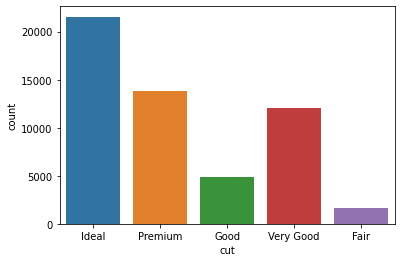

In [12]:
sns.countplot(x = 'cut' , data = data)

data['cut'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

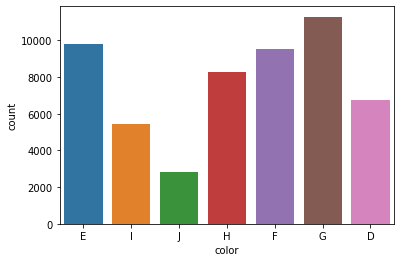

In [13]:
sns.countplot(x = 'color' , data = data)

data['color'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

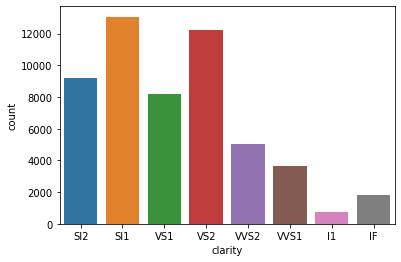

In [14]:
sns.countplot(x = 'clarity' , data = data)

data['clarity'].value_counts()

In [15]:
print("Number of Unique values in the Column wise")
for i in Categorical_column:
    print(""+str(i)+" - ",data[''+str(i)+''].nunique())#,data[''+str(i)+''].unique()

Number of Unique values in the Column wise
cut -  5
color -  7
clarity -  8


3.Seperate features and Labels

# Label Encoding

In [16]:
# Encoding the categorical features

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

data['cut'] = LE.fit_transform(data['cut'])
data['color'] = LE.fit_transform(data['color'])
data['clarity'] = LE.fit_transform(data['clarity'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [17]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

4.Split the dataset to train and test

In [18]:
# Features selection 

X = data[cols]
y = data['price']

from sklearn.model_selection import train_test_split

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=44)

In [19]:
print("data_columns: ",len(data.columns))
print("len_data:",len(data))

print('X: ', len(X))
print("X.shape :", X.shape)

print('y: ', len(y))
print("y.shape :", y.shape)
                
print('')

print('X_TRAIN : ',X_train.shape)
print('y_TRAIN : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

data_columns:  10
len_data: 53940
X:  53940
X.shape : (53940, 9)
y:  53940
y.shape : (53940,)

X_TRAIN :  (43152, 9)
y_TRAIN :  (43152,)
X_test :  (10788, 9)
y_test :  (10788,)


5.Do normalisation if required

In [20]:
from sklearn import preprocessing
train_X = preprocessing.normalize(X_train)
test_X = preprocessing.normalize(X_test)

In [21]:
test_X.shape
#train_X.shape

(10788, 9)

In [22]:
train_X[0:5]

array([[0.00830872, 0.04680967, 0.04680967, 0.03510726, 0.72320947,
        0.67874028, 0.06635271, 0.06705486, 0.04119251],
       [0.01582461, 0.04620325, 0.04620325, 0.04620325, 0.71615033,
        0.6814979 , 0.08177975, 0.08224178, 0.05082357],
       [0.0038199 , 0.02387436, 0.01193718, 0.07162308, 0.73533026,
        0.66848205, 0.05288171, 0.05216547, 0.03234976],
       [0.00962888, 0.02377502, 0.04755004, 0.02377502, 0.73583683,
        0.66570053, 0.07037406, 0.07096843, 0.04374603],
       [0.00375166, 0.02344787, 0.03517181, 0.08206756, 0.73391849,
        0.66826444, 0.05135085, 0.05088189, 0.03200635]])

6.Model Building (ANN)

In [23]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

models = 

    output should be linear fun 

    1. relu
    2. leaky_relu
    3. parametric relu
    4. elu
    5. tan

In [24]:
model = Sequential()
# 9(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)
model.add(Dense(64, input_shape = (9, ), kernel_initializer='normal', activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "linear"))


In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='mse', optimizer = "adam", metrics=['mae'])
result_1 = model.fit(train_X,y_train, epochs = 150, batch_size = 100, validation_data = (test_X, y_test))


Epoch 1/150
432/432 [==============================] - 5s 5ms/step - loss: 23140440.0000 - mae: 3340.7749 - val_loss: 15399476.0000 - val_mae: 3001.1125
Epoch 2/150
432/432 [==============================] - 2s 4ms/step - loss: 15274754.0000 - mae: 2979.7422 - val_loss: 15024597.0000 - val_mae: 2945.5020
Epoch 3/150
432/432 [==============================] - 2s 4ms/step - loss: 14773538.0000 - mae: 2930.6460 - val_loss: 14350969.0000 - val_mae: 2899.9216
Epoch 4/150
432/432 [==============================] - 2s 4ms/step - loss: 13581372.0000 - mae: 2806.7515 - val_loss: 12295807.0000 - val_mae: 2643.1113
Epoch 5/150
432/432 [==============================] - 2s 4ms/step - loss: 8774189.0000 - mae: 2124.1880 - val_loss: 4475247.5000 - val_mae: 1378.7662
Epoch 6/150
432/432 [==============================] - 2s 4ms/step - loss: 3176841.2500 - mae: 1075.2587 - val_loss: 2275207.7500 - val_mae: 874.1199
Epoch 7/150
432/432 [==============================] - 2s 4ms/step - loss: 2084336.8750

In [28]:
#result_1.history

Text(0.5, 1.0, 'Relu with Linear(o/p)')

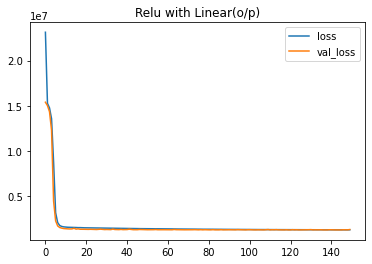

In [27]:
plt.plot(result_1.history['loss'],label='loss')
plt.plot(result_1.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Relu with Linear(o/p)')

# Observations :
  In "Regression" problem we use Linear as Final activation function & loss is mse.

  In "Classification" we use sigmoid , softmax as Final activation function & loss is Cross Entropy or Binary Cross Entropy.

  Since this is Regression we use Linear as output. i used here are 

  In "RELU" : RELU Stands for Rectified linear unit. It is the most widely used non-linear activation function. Chiefly implemented in hidden layers of Neural network.
  
  "Range" is f (x) = max (0, x)
          0 to infinite.

  "Mean squared error (MSE)" — This finds the average squared difference between the predicted value and the true value.

  9(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p).

    loss='mse', 
    optimizer = "adam", 
    metrics=['mae'])
    model.fit(train_X,y_train), 
    epochs = 150, 
    batch_size = 100, 
    validation_data = (test_X, y_test)

The output is quite good. As we can see the variation in Loss.

# model -2 

In [28]:
model_2 = Sequential()
# 9(cols) i/p layer - 128(col)(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)
model_2.add(Dense(128, input_shape = (9, ), kernel_initializer='normal', activation = "elu"))
model_2.add(Dense(64, activation = "elu"))
model_2.add(Dense(32, activation = "elu"))
model_2.add(Dense(16, activation = "elu"))
model_2.add(Dense(8, activation = "elu"))
model_2.add(Dense(1, activation = "linear"))


In [29]:
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
__________________________________________________

In [30]:
model_2.compile(loss='mse', optimizer = "adam", metrics=['mae'])
result_2 = model_2.fit(train_X,y_train, epochs = 90, batch_size = 90, validation_data = (test_X, y_test))

Epoch 1/90
480/480 [==============================] - 3s 4ms/step - loss: 18993652.0000 - mae: 3161.4138 - val_loss: 14943479.0000 - val_mae: 2989.7173
Epoch 2/90
480/480 [==============================] - 2s 4ms/step - loss: 10184062.0000 - mae: 2292.5110 - val_loss: 2751840.5000 - val_mae: 1199.7994
Epoch 3/90
480/480 [==============================] - 2s 4ms/step - loss: 1875944.5000 - mae: 843.0745 - val_loss: 1464082.0000 - val_mae: 708.2310
Epoch 4/90
480/480 [==============================] - 2s 4ms/step - loss: 1432204.8750 - mae: 672.1609 - val_loss: 1337392.5000 - val_mae: 656.0918
Epoch 5/90
480/480 [==============================] - 2s 4ms/step - loss: 1397629.3750 - mae: 668.1394 - val_loss: 1340198.8750 - val_mae: 657.2212
Epoch 6/90
480/480 [==============================] - 2s 4ms/step - loss: 1387953.3750 - mae: 667.4263 - val_loss: 1319881.3750 - val_mae: 651.8909
Epoch 7/90
480/480 [==============================] - 2s 4ms/step - loss: 1374658.5000 - mae: 665.5244 - 

Text(0.5, 1.0, 'elu with Linear(o/p)')

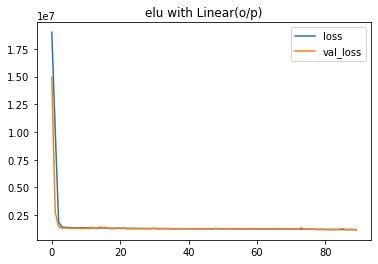

In [31]:
plt.plot(result_2.history['loss'],label='loss')
plt.plot(result_2.history['val_loss'],label='val_loss')
plt.legend()
plt.title('elu with Linear(o/p)')

# Observations :
  Model = "ELU"

  Exponential Linear Unit. This activation function fixes some of the problems with ReLUs and keeps some of the positive things. For this activation function, an alpha α value is picked; a common value is between 0.1 and 0.3 .

  9(cols) i/p layer - 128(col)(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)

    loss='mse', 
    optimizer = "adam", 
    metrics=['mae'])
    model.fit(train_X,y_train), 
    epochs = 90, 
    batch_size = 90, 
    validation_data = (test_X, y_test)

# model - 3

In [32]:
model_3 = Sequential()
# 9(col)(i/p layer) - 256(inner layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)
model_3.add(Dense(256, input_shape = (9, ), kernel_initializer='normal', activation = "LeakyReLU"))
model_3.add(Dense(64, activation = "LeakyReLU"))
model_3.add(Dense(64, activation = "LeakyReLU"))
model_3.add(Dense(32, activation = "LeakyReLU"))
model_3.add(Dense(16, activation = "LeakyReLU"))
model_3.add(Dense(8, activation = "LeakyReLU"))
model_3.add(Dense(1, activation = "linear"))


In [33]:
print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [34]:
model_3.compile(loss='mse', optimizer = "adam", metrics=['mae'])
result_3 = model_3.fit(train_X,y_train, epochs = 100, batch_size = 100, validation_data = (test_X, y_test))

Epoch 1/100
432/432 [==============================] - 3s 5ms/step - loss: 17843384.0000 - mae: 3100.6606 - val_loss: 13837028.0000 - val_mae: 2853.6411
Epoch 2/100
432/432 [==============================] - 2s 4ms/step - loss: 5325019.0000 - mae: 1468.4788 - val_loss: 1713956.0000 - val_mae: 800.0886
Epoch 3/100
432/432 [==============================] - 2s 4ms/step - loss: 1730397.5000 - mae: 763.6251 - val_loss: 1548523.3750 - val_mae: 779.1408
Epoch 4/100
432/432 [==============================] - 2s 5ms/step - loss: 1647998.0000 - mae: 740.1476 - val_loss: 1575442.8750 - val_mae: 743.5415
Epoch 5/100
432/432 [==============================] - 2s 5ms/step - loss: 1599221.2500 - mae: 725.6727 - val_loss: 1468006.0000 - val_mae: 742.6025
Epoch 6/100
432/432 [==============================] - 2s 5ms/step - loss: 1583691.1250 - mae: 714.7352 - val_loss: 1400148.6250 - val_mae: 682.8460
Epoch 7/100
432/432 [==============================] - 2s 5ms/step - loss: 1534332.8750 - mae: 687.97

Text(0.5, 1.0, 'Leaky ReLU with Linear(o/p)')

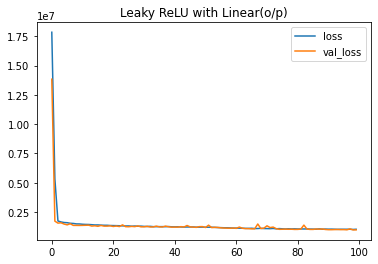

In [35]:
plt.plot(result_3.history['loss'],label='loss')
plt.plot(result_3.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Leaky ReLU with Linear(o/p)')

# Observations:

AF that introduce some small negative slope to the ReLU to sustain and keep the weight updates alive during the entire propagation process

The alpha parameter was introduced as a solution to the ReLUs dead neuron problems such that the gradients will not be zero at any time during training

f (x) = αx + x

  9(col)(i/p layer) - 256(inner layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)

    loss='mse', 
    optimizer = "adam", 
    metrics=['mae'])
    model.fit(train_X,y_train), 
    epochs = 100, 
    batch_size = 100, 
    validation_data = (test_X, y_test)

# model - 4

In [36]:
model_4 = Sequential()
# 9(col)(i/p layer) - 256(inner layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)
model_4.add(Dense(256, input_shape = (9, ), kernel_initializer='normal', activation = "PReLU"))
model_4.add(layers.Dropout(0.2))
model_4.add(Dense(128, activation = "PReLU"))
model_4.add(layers.Dropout(0.2))
model_4.add(Dense(64, activation = "PReLU"))
model_4.add(layers.Dropout(0.2))
model_4.add(Dense(32, activation = "PReLU"))
model_4.add(layers.Dropout(0.2))
model_4.add(Dense(16, activation = "PReLU"))
model_4.add(layers.Dropout(0.2))
model_4.add(Dense(8, activation = "PReLU"))
model_4.add(layers.Dropout(0.2))
model_4.add(Dense(1, activation = "linear"))



In [37]:
print(model_4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               2816      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)               

In [38]:
model_4.compile(loss='mse', optimizer = "adam", metrics=['mae'])
result_4 = model_4.fit(train_X,y_train, epochs = 120, batch_size = 80, validation_data = (test_X, y_test))

Epoch 1/120
540/540 [==============================] - 4s 6ms/step - loss: 17865982.0000 - mae: 2991.5469 - val_loss: 3962738.0000 - val_mae: 1265.4113
Epoch 2/120
540/540 [==============================] - 3s 5ms/step - loss: 4267018.0000 - mae: 1211.4537 - val_loss: 1680383.2500 - val_mae: 750.7911
Epoch 3/120
540/540 [==============================] - 3s 6ms/step - loss: 3472561.2500 - mae: 1079.4956 - val_loss: 1400427.1250 - val_mae: 671.7448
Epoch 4/120
540/540 [==============================] - 3s 5ms/step - loss: 3469127.0000 - mae: 1062.3179 - val_loss: 2234646.0000 - val_mae: 877.3129
Epoch 5/120
540/540 [==============================] - 4s 7ms/step - loss: 3264304.7500 - mae: 1039.5752 - val_loss: 1422476.7500 - val_mae: 653.0972
Epoch 6/120
540/540 [==============================] - 3s 6ms/step - loss: 3346027.0000 - mae: 1054.3196 - val_loss: 1410074.8750 - val_mae: 649.7809
Epoch 7/120
540/540 [==============================] - 3s 6ms/step - loss: 3345395.0000 - mae: 104

Text(0.5, 1.0, 'PReLU with Linear(o/p)')

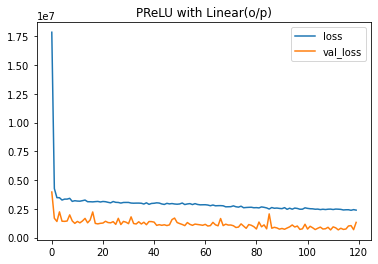

In [39]:
plt.plot(result_4.history['loss'],label='loss')
plt.plot(result_4.history['val_loss'],label='val_loss')
plt.legend()
plt.title('PReLU with Linear(o/p)')


# Observations :
  Parametric leaky ReLU (PReLU) is a variation of Leaky ReLU, where α is authorized to be learned during training. This was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set

  9(col)(i/p layer) - 256(inner layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)

    loss='mse', 
    optimizer = "adam", 
    metrics=['mae'])
    model.fit(train_X,y_train), 
    epochs = 120, 
    batch_size = 80, 
    validation_data = (test_X, y_test).

# model - 5

In [40]:
model_5 = Sequential()
# 128(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)

model_5.add(Dense(256, input_shape = (9, ), kernel_initializer='normal', activation = "tanh"))

model_5.add(Dense(128, activation = "tanh"))
model_5.add(Dense(64, activation = "tanh"))
model_5.add(Dense(32, activation = "tanh"))
model_5.add(Dense(16, activation = "tanh"))
model_5.add(Dense(8, activation = "tanh"))
model_5.add(Dense(1, activation = "linear"))

In [41]:
print(model_5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [42]:
model_5.compile(loss='mse', optimizer = "adam", metrics=['mae'])
result_5 = model_5.fit(train_X,y_train, epochs = 120, batch_size = 80, validation_data = (test_X, y_test))

Epoch 1/120
540/540 [==============================] - 3s 5ms/step - loss: 31415160.0000 - mae: 3935.6506 - val_loss: 31009348.0000 - val_mae: 3890.7520
Epoch 2/120
540/540 [==============================] - 2s 5ms/step - loss: 31375970.0000 - mae: 3930.6428 - val_loss: 30971558.0000 - val_mae: 3885.8972
Epoch 3/120
540/540 [==============================] - 2s 4ms/step - loss: 31337842.0000 - mae: 3925.7913 - val_loss: 30933918.0000 - val_mae: 3881.0481
Epoch 4/120
540/540 [==============================] - 2s 4ms/step - loss: 31299918.0000 - mae: 3920.9626 - val_loss: 30896484.0000 - val_mae: 3876.2251
Epoch 5/120
540/540 [==============================] - 2s 4ms/step - loss: 31262084.0000 - mae: 3916.1338 - val_loss: 30859090.0000 - val_mae: 3871.3979
Epoch 6/120
540/540 [==============================] - 2s 4ms/step - loss: 31224386.0000 - mae: 3911.3115 - val_loss: 30821812.0000 - val_mae: 3866.5789
Epoch 7/120
540/540 [==============================] - 2s 4ms/step - loss: 3118665

Text(0.5, 1.0, 'tanh with Linear(o/p)')

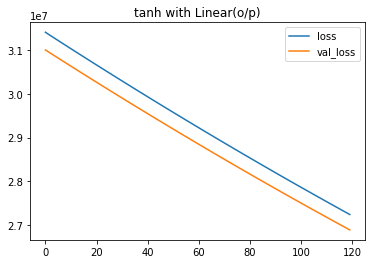

In [43]:
plt.plot(result_5.history['loss'],label='loss')
plt.plot(result_5.history['val_loss'],label='val_loss')
plt.legend()
plt.title('tanh with Linear(o/p)')

# Observations:
The hyperbolic tangent function is another type of AF used in DL and it has some variants used in DL applications. The hyperbolic tangent function known as tanh function, whose range lies between -1 to 1,

  9(col)(i/p layer) - 256(inner layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)

    loss='mse', 
    optimizer = "adam", 
    metrics=['mae'])
    model.fit(train_X,y_train), 
    epochs = 120, 
    batch_size = 80, 
    validation_data = (test_X, y_test).

Text(0.5, 1.0, 'AF WITH LINEAR O/P')

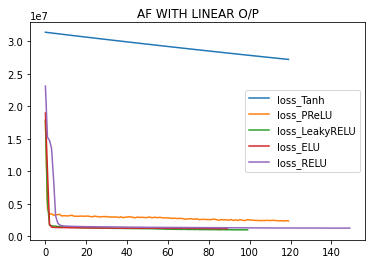

In [44]:
import matplotlib.pyplot as plt

plt.plot(result_5.history['loss'],label='loss_Tanh')
plt.plot(result_4.history['loss'],label='loss_PReLU')
plt.plot(result_3.history['loss'],label='loss_LeakyRELU')
plt.plot(result_2.history['loss'],label='loss_ELU')
plt.plot(result_1.history['loss'],label='loss_RELU')
plt.legend()
plt.title('AF WITH LINEAR O/P')

# Observations :

  As we can see there is limit in tan of (-1 to 1)

  so we got output as less and not similar to other while others are in similar.

While otehr relu, leaky_relu, parametric_relu, elu all  range's are good compared to tan. 